In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
from lstm_model import build_model, train_model, save_lstm_model, load_lstm_model
from models.lstm_v2.lstm_normalize import get_lstm_data
from utils.chart import config_chart
from constants import SP500_TICKER
# import tensorflow as tf


---

## For **build_model** function

In [3]:
model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 90)                33840     
                                                                 
 dense (Dense)               (None, 90)                8190      
                                                                 
 dense_1 (Dense)             (None, 45)                4095      
                                                                 
 dense_2 (Dense)             (None, 45)                2070      
                                                                 
 dense_3 (Dense)             (None, 45)                2070      
                                                                 
 dense_4 (Dense)             (None, 45)                2070      
                                                                 
 dense_5 (Dense)             (None, 6)                 

---

## For **train_model** function

In [4]:
train, test, predict = get_lstm_data(SP500_TICKER)

x_train = train['x']
y_train = train['y']
x_dates_train = train['x_dates']
y_dates_train = train['y_dates']

x_test = test['x']
y_test = test['y']
x_dates_test = test['x_dates']
y_dates_test = test['y_dates']

x_predict = predict['x']
y_predict = predict['y']
x_dates_predict = predict['x_dates']
y_dates_predict = predict['y_dates']

In [5]:
print(x_train.shape)
print(y_train.shape)

(4832, 15, 3)
(4832, 2, 3)


In [6]:
print(x_test.shape)
print(y_test.shape)

(604, 15, 3)
(604, 2, 3)


In [7]:
# plt = config_chart('Model Data')
# plt.plot(y_dates_train[:, 0], y_train[:, 0])
# plt.plot(y_dates_test[:, 0], y_test[:, 0])
# plt.plot(y_dates_predict[:, 0], y_predict[:, 0])
# plt.legend(['Train', 'Test','Predict'])

In [8]:
model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test)

Epoch 1/150


151/151 - 3s - loss: 0.0976 - mean_absolute_error: 0.2164 - 3s/epoch - 17ms/step
Epoch 2/150
151/151 - 1s - loss: 0.0850 - mean_absolute_error: 0.1859 - 563ms/epoch - 4ms/step
Epoch 3/150
151/151 - 1s - loss: 0.0846 - mean_absolute_error: 0.1837 - 572ms/epoch - 4ms/step
Epoch 4/150
151/151 - 1s - loss: 0.0848 - mean_absolute_error: 0.1844 - 582ms/epoch - 4ms/step
Epoch 5/150
151/151 - 1s - loss: 0.0846 - mean_absolute_error: 0.1836 - 590ms/epoch - 4ms/step
Epoch 6/150
151/151 - 1s - loss: 0.0844 - mean_absolute_error: 0.1827 - 567ms/epoch - 4ms/step
Epoch 7/150
151/151 - 1s - loss: 0.0844 - mean_absolute_error: 0.1824 - 566ms/epoch - 4ms/step
Epoch 8/150
151/151 - 1s - loss: 0.0842 - mean_absolute_error: 0.1816 - 590ms/epoch - 4ms/step
Epoch 9/150
151/151 - 1s - loss: 0.0845 - mean_absolute_error: 0.1829 - 579ms/epoch - 4ms/step
Epoch 10/150
151/151 - 1s - loss: 0.0842 - mean_absolute_error: 0.1816 - 585ms/epoch - 4ms/step
Epoch 11/150
151/151 - 1s - loss: 0.0841 - mean_a

Text(0, 0.5, 'Value')

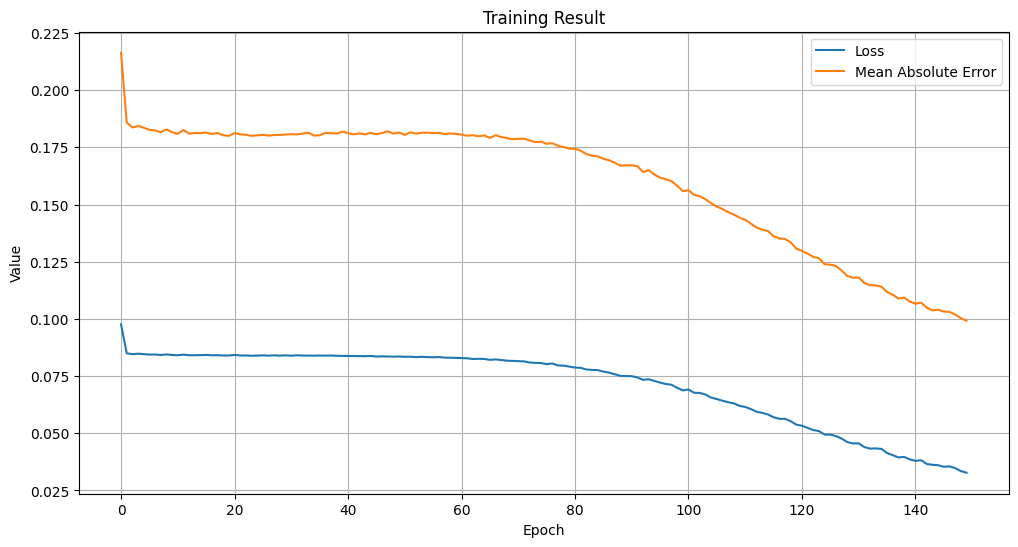

In [9]:
plt = config_chart('Training Result')
plt.plot(fit_result.history['loss'])
plt.plot(fit_result.history['mean_absolute_error'])
plt.legend(['Loss', 'Mean Absolute Error'])
plt.xlabel('Epoch')
plt.ylabel('Value')

In [10]:
save_lstm_model(model)
model = load_lstm_model()

INFO:tensorflow:Assets written to: ./models/lstm_v2/lstm_model_v2\assets


INFO:tensorflow:Assets written to: ./models/lstm_v2/lstm_model_v2\assets


In [11]:
predictions = model.predict(x_test)

19/19 [==============================] - 0s 2ms/step


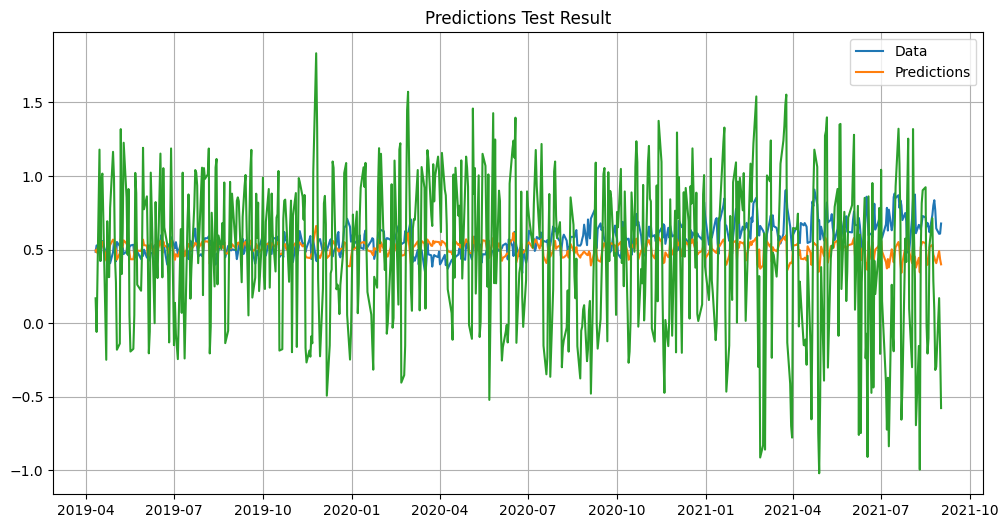

In [12]:
plt = config_chart('Predictions Test Result')
# plt.plot(y_dates_test[:, 0], y_test[:, 0])
plt.plot(y_dates_test[:, 0], predictions[:, 0])
plt.legend(['Data', 'Predictions'])

In [13]:
predictions = model.predict(x_predict)

19/19 [==============================] - 0s 2ms/step


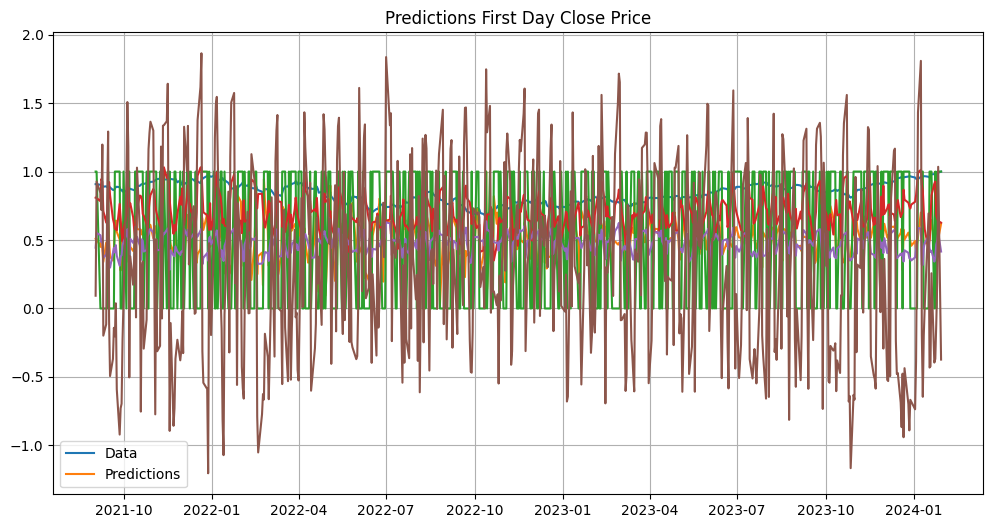

In [14]:
plt = config_chart('Predictions First Day Close Price')
plt.plot(y_dates_predict[:, 0], y_predict[:, 0])
plt.plot(y_dates_predict[:, 0], predictions[:, 0])
plt.legend(['Data', 'Predictions'])

In [15]:

predictions = model.predict(x_predict)

19/19 [==============================] - 0s 2ms/step


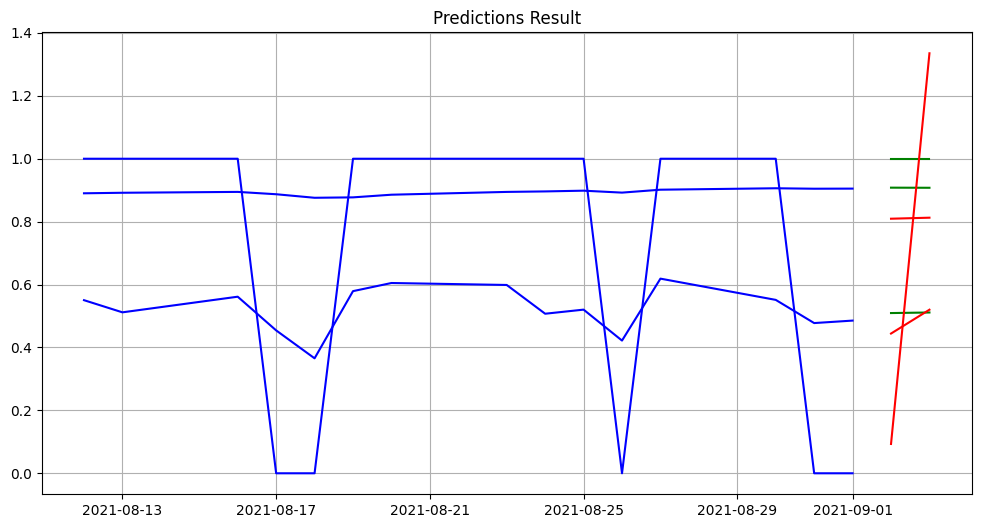

In [17]:
index = 0

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index], color='blue')
plt.plot(y_dates_predict[index], y_predict[index], color='green')
plt.plot(y_dates_predict[index], predictions[index], color='red')
# plt.legend(['Data', 'Real', 'Predictions'])

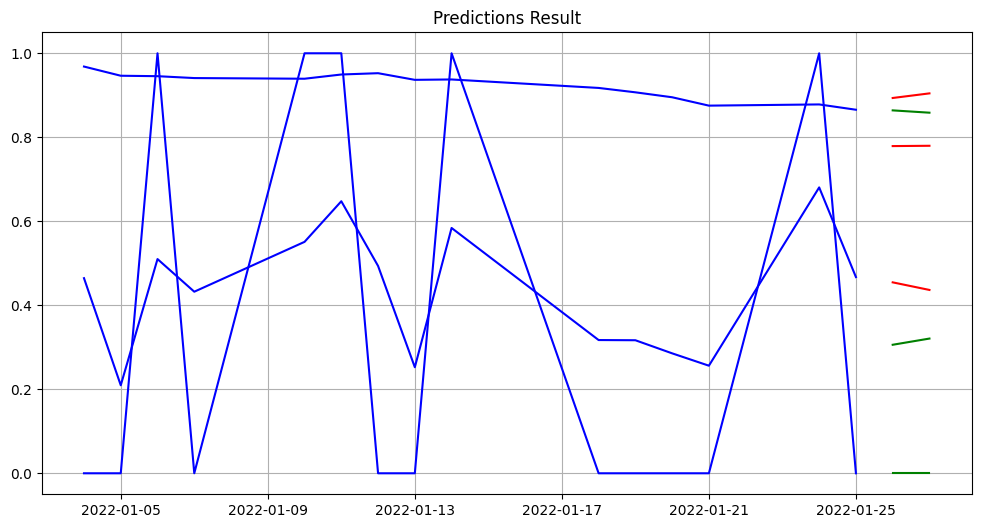

In [18]:
index = 100

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index], color='blue')
plt.plot(y_dates_predict[index], y_predict[index], color='green')
plt.plot(y_dates_predict[index], predictions[index], color='red')

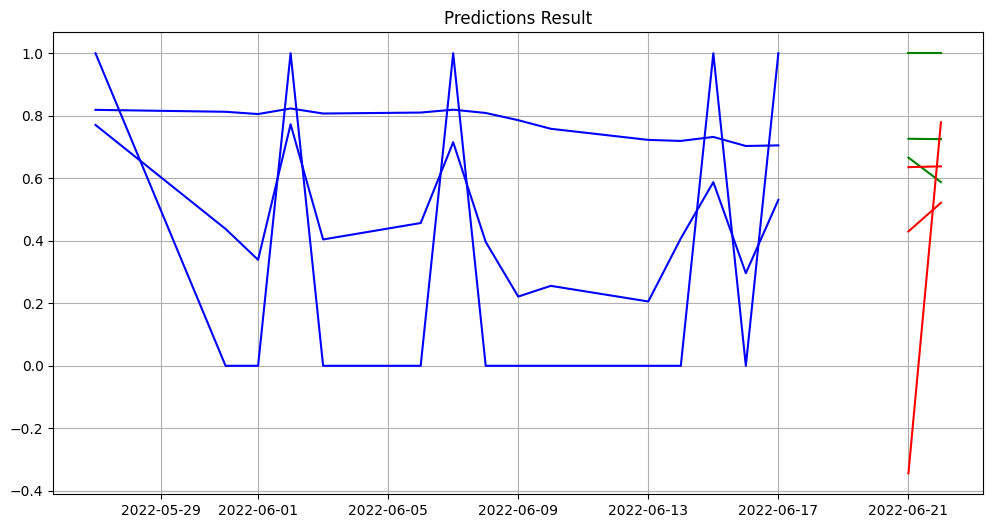

In [19]:
index = 200

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index], color='blue')
plt.plot(y_dates_predict[index], y_predict[index], color='green')
plt.plot(y_dates_predict[index], predictions[index], color='red')

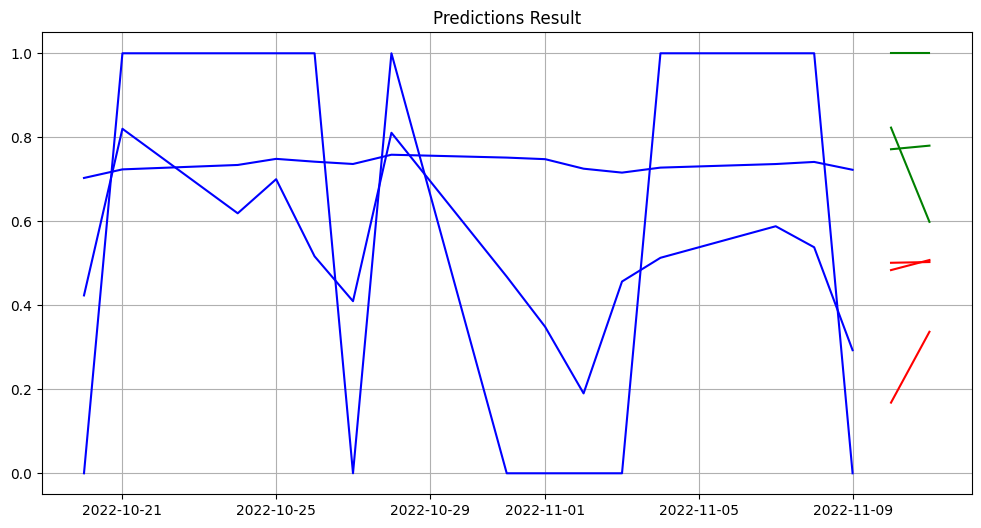

In [20]:
index = 300

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index], color='blue')
plt.plot(y_dates_predict[index], y_predict[index], color='green')
plt.plot(y_dates_predict[index], predictions[index], color='red')

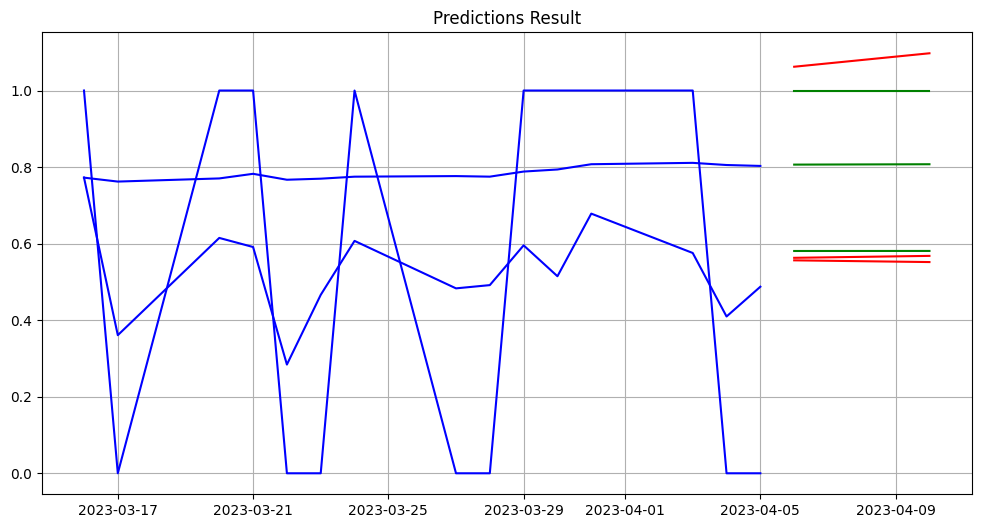

In [21]:
index = 400

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index], color='blue')
plt.plot(y_dates_predict[index], y_predict[index], color='green')
plt.plot(y_dates_predict[index], predictions[index], color='red')

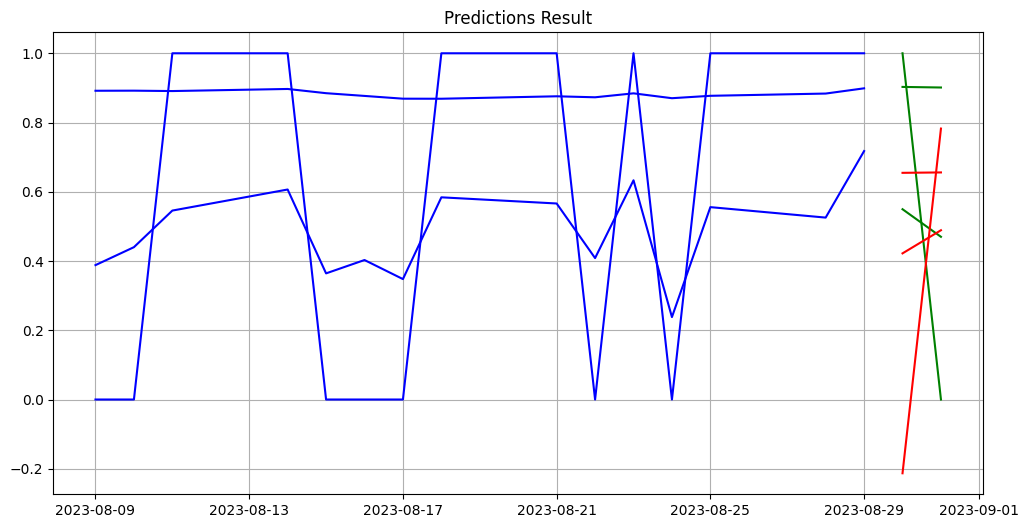

In [22]:
index = 500

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index], color='blue')
plt.plot(y_dates_predict[index], y_predict[index], color='green')
plt.plot(y_dates_predict[index], predictions[index], color='red')

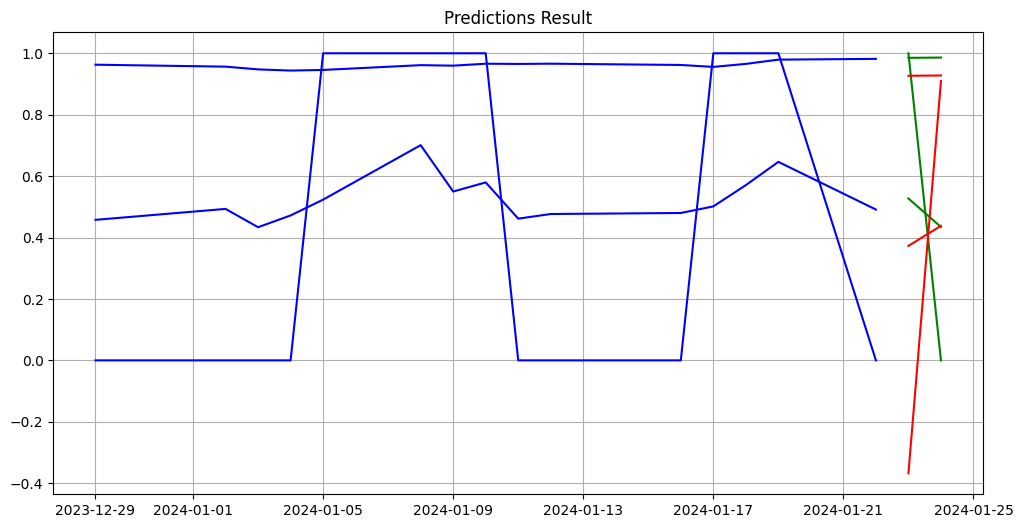

In [23]:
index = 599

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index], color='blue')
plt.plot(y_dates_predict[index], y_predict[index], color='green')
plt.plot(y_dates_predict[index], predictions[index], color='red')